In [41]:
#Program to generate the Bell state psi-
from qiskit import *

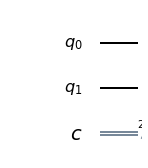

In [56]:
qc=QuantumCircuit(2,2) #Creating a quantum circuit with 2 qubits and 2 bits
qc.draw(output='mpl')

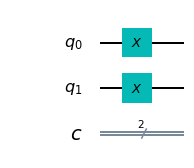

In [57]:
#Process is similar to the creation of phi+ with the additional step of adding a X gate of both the qubits as shown.
qc.x([0,1]) #applying a X gate to both the qubits, state of the two qubits is ket(11)
qc.draw(output='mpl')
#After this, the process is exactly the same as that of generating phi+

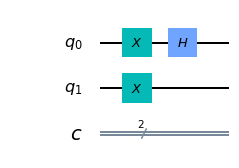

In [58]:
#Applying a hadamard gate to q0
qc.h(0) # This takes q0 from ket(1) to ket(-)
qc.draw(output='mpl')

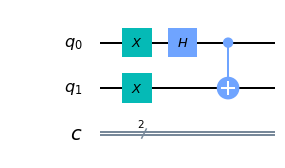

In [59]:
#Applying a cnot gate with q0 as the control qubit and q1 as the target qubit
qc.cx(0,1) #This gives psi-
qc.draw(output='mpl')

In [60]:
#Simulating the statevector of the two qubits
#Aer.backends()
backend_req=Aer.get_backend('statevector_simulator')#setting up the required backend

In [61]:
#Executing the circuit
job_req=execute(qc,backend_req)

In [62]:
#Extracting the results
req_statevector=job_req.result().get_statevector()
#print(type(req_statevector))
for amplitude in req_statevector:
    print(amplitude)
#amplitudes corresponding to the basis states ket(00),ket(10),ket(01),ket(11) respectively(different from normal order)

0j
(-0.7071067811865476+8.659560562354934e-17j)
(0.7071067811865476-8.659560562354934e-17j)
0j


In [63]:
print(req_statevector)

[ 0.        +0.00000000e+00j -0.70710678+8.65956056e-17j
  0.70710678-8.65956056e-17j  0.        +0.00000000e+00j]


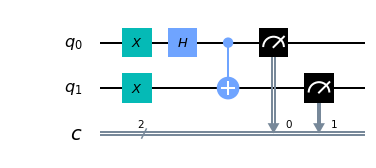

In [64]:
#perform a measurement on both the qubits
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

In [69]:
#Executing the circuit on a simulated quantum device
backend_sim_qd=Aer.get_backend('qasm_simulator')#setting up the required backend
job_sim_qd=execute(qc,backend_sim_qd,shots=8000)

In [70]:
#Extracting the results
hist=job_sim_qd.result().get_counts()
print(hist)

{'10': 3980, '01': 4020}


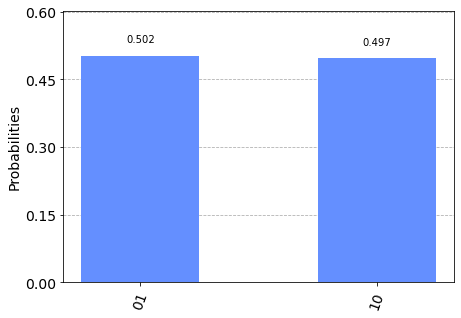

In [71]:
#Plotting the results
from qiskit.visualization import plot_histogram
plot_histogram(hist)